In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



In [51]:
# 1. Carregar e Exibir Dados
file_path = 'ligue180-2014.csv'
data = pd.read_csv(file_path, delimiter=';')


In [52]:
# Exibir as primeiras linhas e informações básicas do dataset
print("Primeiras linhas do dataset:")
print(data.head())
print("\nInformações do dataset:")
print(data.info())

Primeiras linhas do dataset:
              data_atendimento         tipo_violencia violencia_familiar  \
0  2014-01-17 00:00:00.0000000  VIOLENCIA PSICOLOGICA                Sim   
1  2014-01-17 00:00:00.0000000  VIOLENCIA PSICOLOGICA                Não   
2  2014-01-17 00:00:00.0000000  VIOLENCIA PSICOLOGICA                Sim   
3  2014-01-17 00:00:00.0000000  VIOLENCIA PATRIMONIAL                Sim   
4  2014-01-01 00:00:00.0000000       VIOLENCIA FISICA                Sim   

  denunciante filhos_vitima dependencia_financeira_vitima sexo_vitima  \
0      Vítima             2                           Não    Feminino   
1      Vítima             2                           Sim    Feminino   
2     Cônjuge             2                           Não    Feminino   
3      Vítima           NaN                           NaN    Feminino   
4    Amigo(a)           NaN                           NaN         NaN   

  cor_vitima faixa_etaria_vitima            escolaridade_vitima  ...  \
0  

In [53]:
# 2. Limpeza dos Dados
# Remover linhas com valores ausentes
data_cleaned = data.dropna()

In [54]:
# Converter colunas de data/hora para timestamps
for col in data_cleaned.select_dtypes(include=['datetime64[ns]']).columns:
    data_cleaned[col] = data_cleaned[col].astype(int) / 10**9

In [55]:
# Codificar colunas categóricas
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns)

In [56]:
# Exibir estatísticas básicas do dataset limpo
print("\nEstatísticas básicas do dataset limpo:")
print(data_cleaned.describe())


Estatísticas básicas do dataset limpo:
       data_atendimento_2014-01-01 00:00:00.0000000  \
count                                         12765   
unique                                            2   
top                                           False   
freq                                          12723   

       data_atendimento_2014-01-02 00:00:00.0000000  \
count                                         12765   
unique                                            2   
top                                           False   
freq                                          12700   

       data_atendimento_2014-01-03 00:00:00.0000000  \
count                                         12765   
unique                                            2   
top                                           False   
freq                                          12707   

       data_atendimento_2014-01-04 00:00:00.0000000  \
count                                         12765   
unique                

In [57]:
# Salvar dados limpos em um novo arquivo CSV
cleaned_file_path = 'ligue180-2014-cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

In [58]:
# 3. Análise com Decision Tree
# Separar variáveis independentes e dependentes
X = data_cleaned.iloc[:, :-1]
y = data_cleaned.iloc[:, -1]

In [59]:
# Codificar a variável alvo se necessário
if y.dtype == 'object':
    y = pd.factorize(y)[0]

In [60]:
# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Inicializar e treinar o classificador Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

In [63]:
# Avaliar o classificador
dt_accuracy = accuracy_score(y_test, y_pred)
dt_report = classification_report(y_test, y_pred)

print(f'\nPrecisão da Decision Tree: {dt_accuracy}')
print(f'\nRelatório de Classificação da Decision Tree:\n{dt_report}')


Precisão da Decision Tree: 1.0

Relatório de Classificação da Decision Tree:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       340
        True       1.00      1.00      1.00      3490

    accuracy                           1.00      3830
   macro avg       1.00      1.00      1.00      3830
weighted avg       1.00      1.00      1.00      3830



<Figure size 1000x700 with 0 Axes>

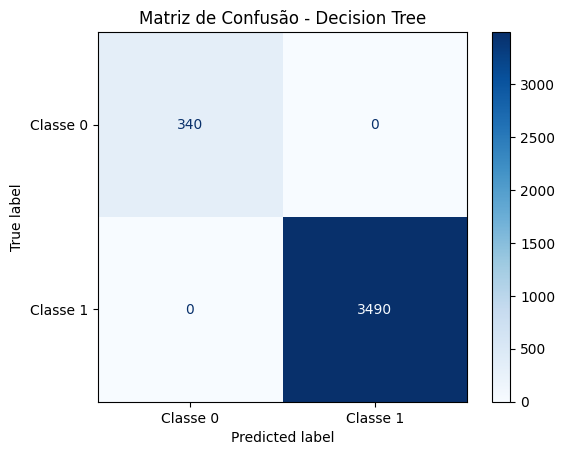

In [64]:
# Plotar a Matriz de Confusão
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Decision Tree')
plt.show()

In [65]:
# 4. Análise com KMeans
# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [66]:
# Aplicar PCA para redução de dimensionalidade (2 componentes)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [67]:
# Determinar o número de clusters usando o método do cotovelo
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

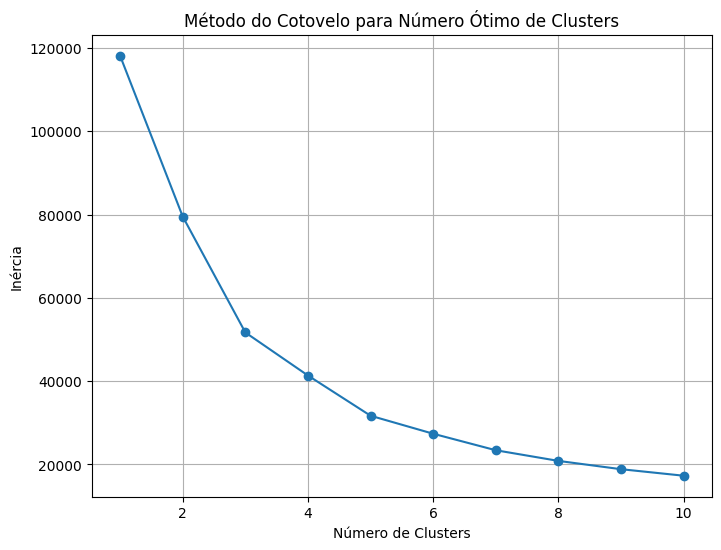

In [68]:
# Plotar o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

In [69]:
# Aplicar KMeans com o número ótimo de clusters (supondo 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_pca)

In [70]:
# Adicionar os rótulos dos clusters ao dataset original
data_cleaned['Cluster'] = clusters

In [71]:
# Salvar os dados com clusters em um novo arquivo CSV
clustered_file_path = 'ligue180-2014-clustered.csv'
data_cleaned.to_csv(clustered_file_path, index=False)

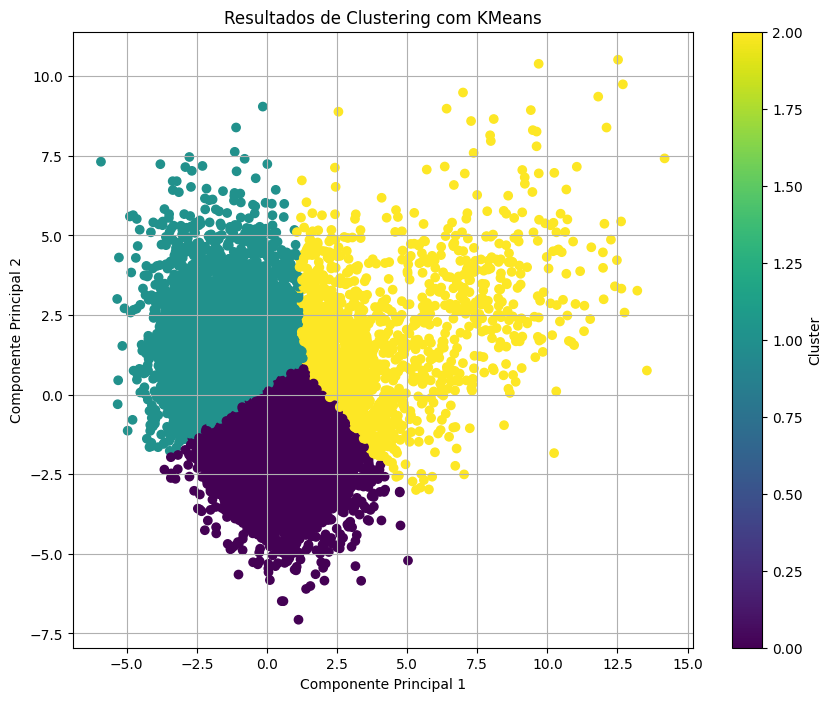

In [72]:
# Visualizar os clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Resultados de Clustering com KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [73]:
# 5. Análise com Rede Neural
# Padronizar as características
X_scaled = scaler.fit_transform(X)

In [74]:
# Converter a variável alvo para categórica (one-hot encoding)
y_categorical = to_categorical(y)

In [75]:
# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)

In [76]:
# Inicializar a rede neural
model = Sequential()

In [77]:
# Adicionar camada de entrada e primeira camada oculta
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

C:\Users\smour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
# Adicionar segunda camada oculta
model.add(Dense(64, activation='relu'))

In [79]:
# Adicionar camada de saída
model.add(Dense(y_categorical.shape[1], activation='softmax'))

In [80]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8777 - loss: 0.3099 - val_accuracy: 0.9396 - val_loss: 0.1852
Epoch 2/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9932 - loss: 0.0164 - val_accuracy: 0.9418 - val_loss: 0.1912
Epoch 3/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9261 - val_loss: 0.2199
Epoch 4/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 2.5999e-04 - val_accuracy: 0.9233 - val_loss: 0.2184
Epoch 5/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 4.8283e-05 - val_accuracy: 0.9211 - val_loss: 0.2250
Epoch 6/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 2.6375e-05 - val_accuracy: 0.9217 - val_loss: 0.2322
Epoch 7/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 1.8924e-05 - val_accuracy: 0.9217 - val_loss: 0.2383
Epoch 8/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 

In [82]:
# Avaliar o modelo no conjunto de teste
nn_loss, nn_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nPrecisão da Rede Neural no Teste: {nn_accuracy}')


Precisão da Rede Neural no Teste: 0.917493462562561


In [83]:
# Plotar a perda e a precisão durante o treinamento
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

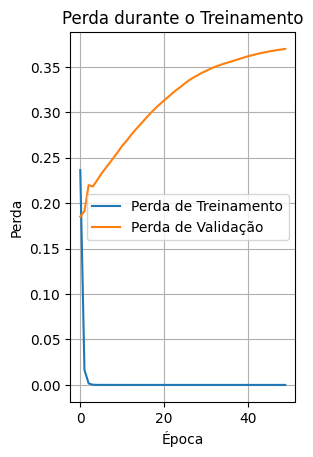

In [84]:
# Plotar perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)


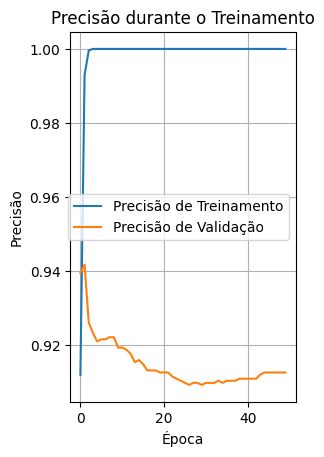

In [85]:
# Plotar precisão
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisão de Treinamento')
plt.plot(history.history['val_accuracy'], label='Precisão de Validação')
plt.title('Precisão durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend()
plt.grid(True)

plt.show()